In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.makedirs("data/processed", exist_ok=True)

In [2]:
df = pd.read_csv("data/stock_prices.csv", parse_dates=["Date"])

# Pivot so you get a clean prices matrix: rows = dates, columns = tickers
prices = df.pivot(index="Date", columns="Ticker", values="Close").sort_index()

prices.head()

# Forward-fill then back-fill any gaps
prices = prices.ffill().bfill()

prices.to_csv("data/processed/prices_close.csv")

In [3]:
# Simple daily returns: (P_t - P_{t-1}) / P_{t-1}
returns = prices.pct_change().dropna()

# Optionally also compute log returns if you want later:
log_returns = np.log(prices / prices.shift(1)).dropna()

returns.to_csv("data/processed/returns_simple.csv")
log_returns.to_csv("data/processed/returns_log.csv")

returns.describe()
returns.isna().sum()

Ticker
AAPL    0
AMZN    0
GOOG    0
META    0
MSFT    0
NVDA    0
TSLA    0
dtype: int64

In [4]:
TRADING_DAYS = 252
WINDOW_SHORT = 21    # ~1 month
WINDOW_LONG = 63     # ~3 months

# Realized volatility = rolling std of daily returns × sqrt(252) (annualized)
vol_21 = returns.rolling(WINDOW_SHORT).std() * np.sqrt(TRADING_DAYS)
vol_63 = returns.rolling(WINDOW_LONG).std() * np.sqrt(TRADING_DAYS)

vol_21.to_csv("data/processed/volatility_21d_annualized.csv")
vol_63.to_csv("data/processed/volatility_63d_annualized.csv")


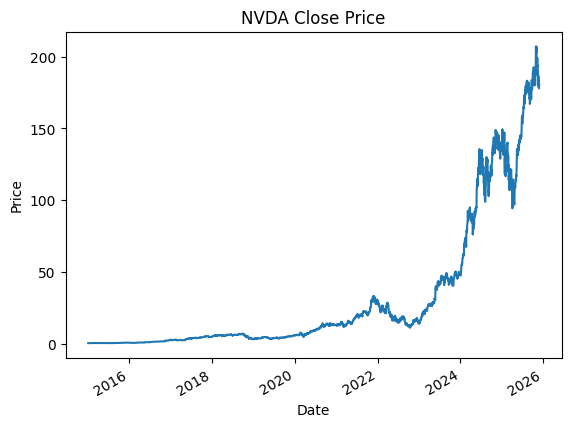

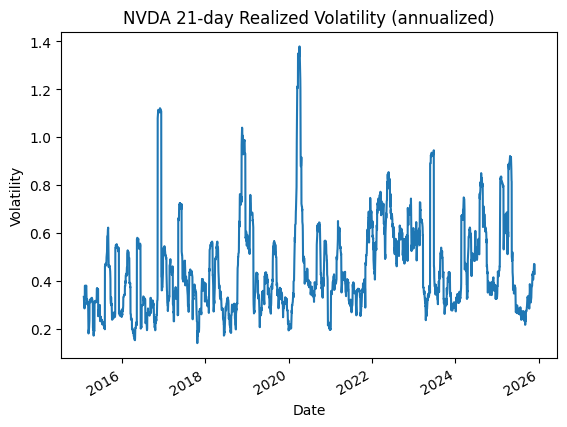

In [5]:
ticker = "NVDA"

plt.figure()
prices[ticker].plot()
plt.title(f"{ticker} Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

plt.figure()
vol_21[ticker].plot()
plt.title(f"{ticker} 21-day Realized Volatility (annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


In [6]:
# Example: use 21d vol as the main target
vol_21.to_csv("data/processed/volatility_target.csv")